## Aula de ML Notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv("spotify-tracks-dataset.csv").iloc[:,6:]
spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
spotify.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
spotify.dtypes

popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [5]:
i8min, i8max, i16min, i16max, i32min, i32max, i64min, i64max = np.iinfo(np.int8).min, np.iinfo(np.int8).max, np.iinfo(np.int16).min, np.iinfo(np.int16).max, np.iinfo(np.int32).min, np.iinfo(np.int32).max, np.iinfo(np.int64).min, np.iinfo(np.int64).max
print(f'int8:[{i8min}, {i8max}]')
print(f'int16:[{i16min}, {i16max}]')
print(f'int32:[{i32min}, {i32max}]')
print(f'int64:[{i64min}, {i64max}]\n')


f16min, f16max, f32min, f32max, f64min, f64max = np.finfo(np.float16).min, np.finfo(np.float16).max, np.finfo(np.float32).min, np.finfo(np.float32).max, np.finfo(np.float64).min, np.finfo(np.float64).max
#float8 does not exist
print(f'float16:[{f16min}, {f16max}]')
print(f'float32:[{f32min}, {f32max}]')
print(f'float64:[{f64min}, {f64max}]')

int8:[-128, 127]
int16:[-32768, 32767]
int32:[-2147483648, 2147483647]
int64:[-9223372036854775808, 9223372036854775807]

float16:[-65504.0, 65504.0]
float32:[-3.4028234663852886e+38, 3.4028234663852886e+38]
float64:[-1.7976931348623157e+308, 1.7976931348623157e+308]


In [9]:
spotify['popularity'] = spotify['popularity'].astype('int8')
spotify['duration_ms'] = spotify['duration_ms'].astype('int32')
spotify['danceability'] = spotify['danceability'].astype('float16')
spotify['energy'] = spotify['energy'].astype('float16')
spotify['key'] = spotify['key'].astype('int8')
spotify['loudness'] = spotify['loudness'].astype('float16')
spotify['speechiness'] = spotify['speechiness'].astype('float16')
spotify['acousticness'] = spotify['acousticness'].astype('float16')
spotify['instrumentalness'] = spotify['instrumentalness'].astype('float32')
spotify['liveness'] = spotify['liveness'].astype('float16')
spotify['valence'] = spotify['valence'].astype('float16')
spotify['tempo'] = spotify['tempo'].astype('float16')
spotify['time_signature'] = spotify['time_signature'].astype('int8')
spotify = spotify.drop(['mode', 'track_genre'], axis = 1)
spotify.dtypes

popularity             int8
duration_ms           int32
explicit               bool
danceability        float16
energy              float16
key                    int8
loudness            float16
speechiness         float16
acousticness        float16
instrumentalness    float32
liveness            float16
valence             float16
tempo               float16
time_signature         int8
dtype: object

In [10]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int8   
 1   duration_ms       114000 non-null  int32  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float16
 4   energy            114000 non-null  float16
 5   key               114000 non-null  int8   
 6   loudness          114000 non-null  float16
 7   speechiness       114000 non-null  float16
 8   acousticness      114000 non-null  float16
 9   instrumentalness  114000 non-null  float32
 10  liveness          114000 non-null  float16
 11  valence           114000 non-null  float16
 12  tempo             114000 non-null  float16
 13  time_signature    114000 non-null  int8   
dtypes: bool(1), float16(8), float32(1), int32(1), int8(3)
memory usage: 3.0 MB


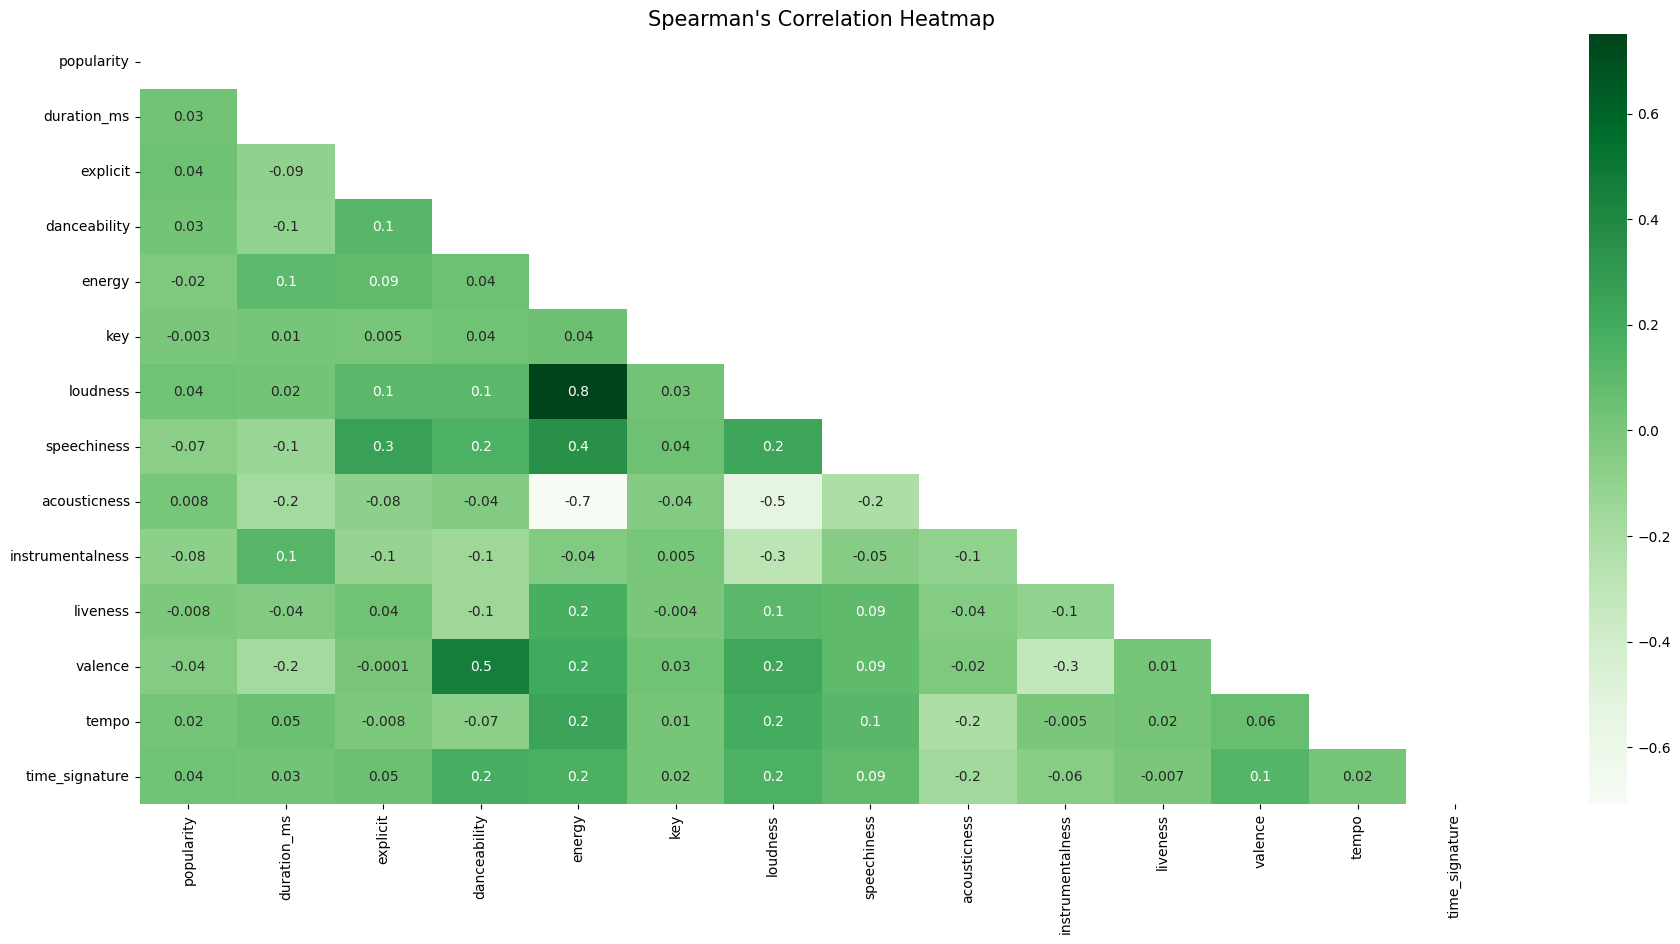

In [11]:
# Computing Spearman's Correlation
correlation = spotify.corr(method = 'spearman')

# Plotting the lower triangle of the correlation map
def corr_heatmap(correlation):
    plt.figure(figsize=(22, 10))
    ax = sns.heatmap(data = correlation, annot = True, mask = np.triu(np.ones_like(correlation)), cmap = 'Greens', fmt = '.1')
    ax.set_title("Spearman's Correlation Heatmap", fontdict = {'fontsize': 15})
    plt.show()

corr_heatmap(correlation)

In [12]:
spotify = spotify.drop('energy', axis = 1)

In [13]:
X = spotify.drop('danceability', axis=1)
Y = spotify['danceability']

**train** (`X_train` and `y_train`), **validation** (`X_val` and `y_val`) and **test** (`X_test` and `y_test`). Our dataset size will then be **70% for train**, **15% for validation** and **15% for test**.

In [ ]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X,Y, test_size=0.15, random_state=42)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1765, random_state=42)

In [19]:
model = RandomForestRegressor()
model.fit(X_train_val, Y_train_val)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
model.score(X_test, Y_test)

0.7316433380323798

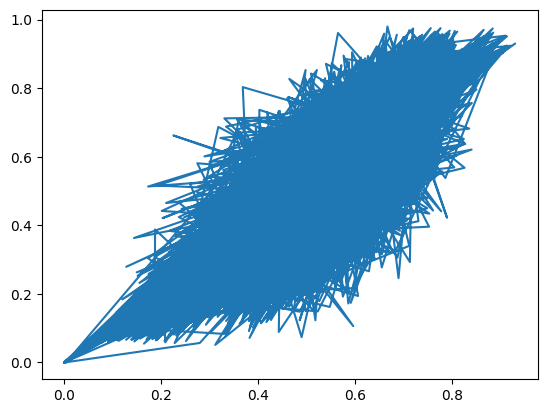

In [21]:
plt.plot(model.predict(X_test), Y_test)